# P3 CONCEVEZ UNE APPLICATION AU SERVICE DE LA SANTE PUBLIQUE
# P3_02 Analyse exploratoire

# Mener des analyses univariées, bivariées et multivariées.

In [3]:
# importation bibliothèques

In [220]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from scipy import stats

In [221]:
# importation data

In [222]:
data=pd.read_csv('projet3_clean')

## Description data

In [223]:
data.head()

,Unnamed: 0,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g,product_name,additives,nutrition_grade_fr
0,0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,2230.0,1.0,12.0,Zen Party Mix,[ roasted-peanuts -> en:roasted-peanuts ] [...,D
1,1,5.95,1.19,66.67,2.38,9.5,16.67,0.02540,0.010,1096.0,0.0,-6.0,Organic Oat Groats,[ organic-oat-groats -> en:organic-oat-groats...,A
2,2,17.50,7.50,42.50,32.50,5.0,7.50,0.28448,0.112,1464.0,0.0,14.0,Energy Power Mix,[ yogurt-raisins -> en:yogurt-raisins ] [ r...,D
3,3,50.00,3.33,23.33,6.67,10.0,6.67,1.27000,0.500,2372.0,2.0,11.0,Fire Roasted Hatch Green Chile Almonds,[ dry-roasted-almonds -> en:dry-roasted-almon...,D
4,4,20.00,2.22,60.00,33.33,4.4,8.89,0.19812,0.078,1954.0,3.0,9.0,Peanut Butter Power Chews,[ peanut-butter -> en:peanut-butter ] [ but...,C


In [224]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [225]:
data.columns

Index(['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'energy_100g', 'additives_n', 'nutrition-score-fr_100g', 'product_name',
       'additives', 'nutrition_grade_fr'],
      dtype='object')

In [226]:
data.dtypes

fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
energy_100g                float64
additives_n                float64
nutrition-score-fr_100g    float64
product_name                object
additives                   object
nutrition_grade_fr          object
dtype: object

In [227]:
# transformer object en category

In [228]:
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [229]:
data.dtypes

fat_100g                    float64
saturated-fat_100g          float64
carbohydrates_100g          float64
sugars_100g                 float64
fiber_100g                  float64
proteins_100g               float64
salt_100g                   float64
sodium_100g                 float64
energy_100g                 float64
additives_n                 float64
nutrition-score-fr_100g     float64
product_name               category
additives                  category
nutrition_grade_fr         category
dtype: object

In [230]:
data.describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g
count,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000
mean,10.824128,4.115824,31.683681,14.242646,2.114608,7.050089,1.254551,0.493921,1056.789384,2.051066,8.149920
std,14.145343,6.560760,27.879128,19.030033,3.097899,7.633006,4.119425,1.621814,708.015330,2.540369,9.021184
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.380000,0.000000,6.670000,1.320000,0.000000,1.500000,0.101600,0.040000,381.000000,0.000000,0.000000
50%,4.900000,1.090000,21.000000,5.000000,1.200000,4.800000,0.650240,0.256000,1046.000000,1.000000,8.000000
75%,17.240000,6.000000,57.000000,21.430000,3.200000,10.000000,1.358900,0.535000,1594.000000,3.000000,15.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,86.000000,100.000000,39.370079,3761.000000,31.000000,36.000000


In [231]:
data.describe(include=['category'])

,product_name,additives,nutrition_grade_fr
count,158516,153650,153882
unique,115479,124698,5
top,Ice Cream,[ semolina -> en:semolina ] [ wheat -> en:w...,D
freq,404,188,40203


# Analyses univariés

In [232]:
# variables quantitatives continues

In [233]:
var_quant=['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'energy_100g']

In [234]:
# variables quantitatives discretes

In [235]:
var_disc=['additives_n','nutrition-score-fr_100g']

In [236]:
#variables qualitatives nominales

In [237]:
var_nom=['additives','product_name']

In [238]:
# variables ordinales

In [239]:
var_ord=['nutrition_grade_fr']

In [240]:
# distribution var_quant

In [241]:
df=data.loc[:,var_quant]

## Vaiables continues
## creation formule visualisation distribution 

In [242]:
def histplot_df(v):
    plt.figure(figsize=(16, 6))
    sns.histplot(df[v],kde=True)
    plt.title(v)
    

In [243]:
# creation formule boxplot

In [244]:
def boxplot_df(v):
    plt.figure(figsize=(16, 6))
    sns.boxplot(y=df[v])
    plt.title(v)

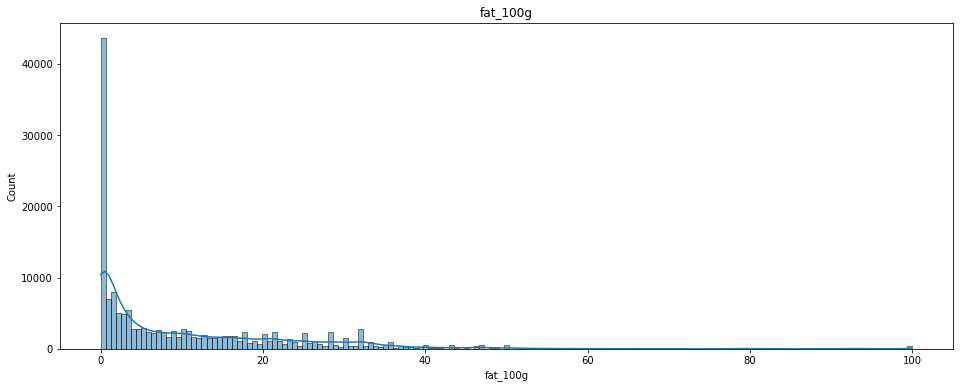

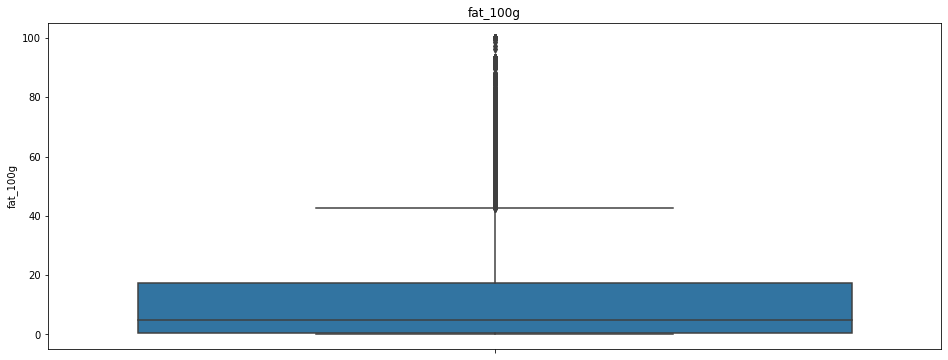

In [245]:
histplot_df('fat_100g')
boxplot_df('fat_100g')

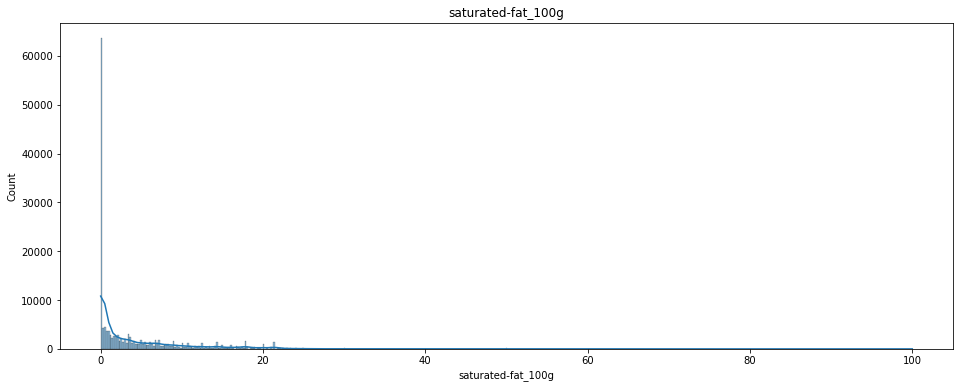

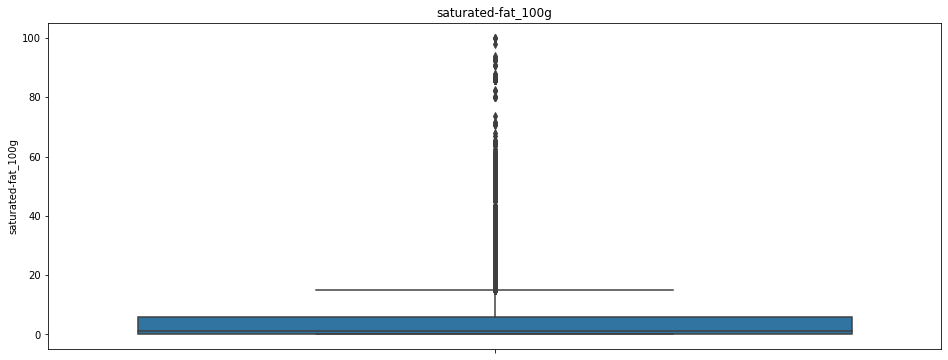

In [246]:
histplot_df('saturated-fat_100g')
boxplot_df('saturated-fat_100g')

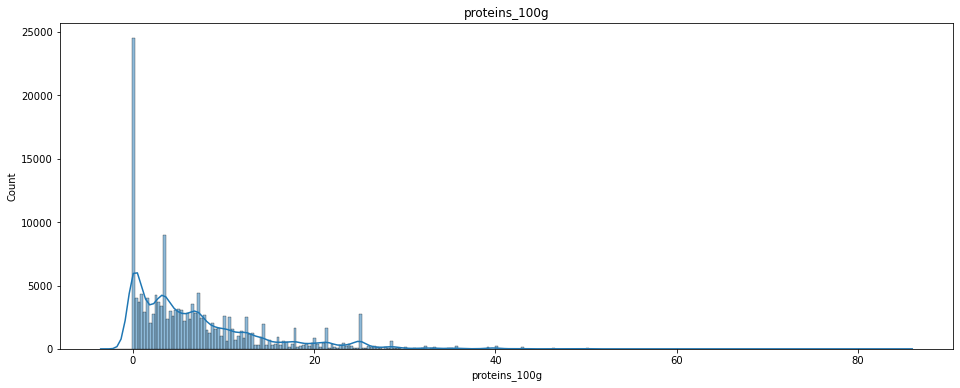

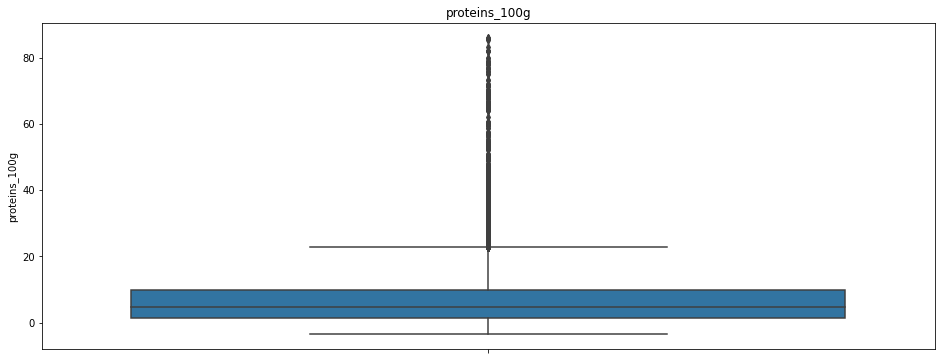

In [247]:
histplot_df('proteins_100g')
boxplot_df('proteins_100g')

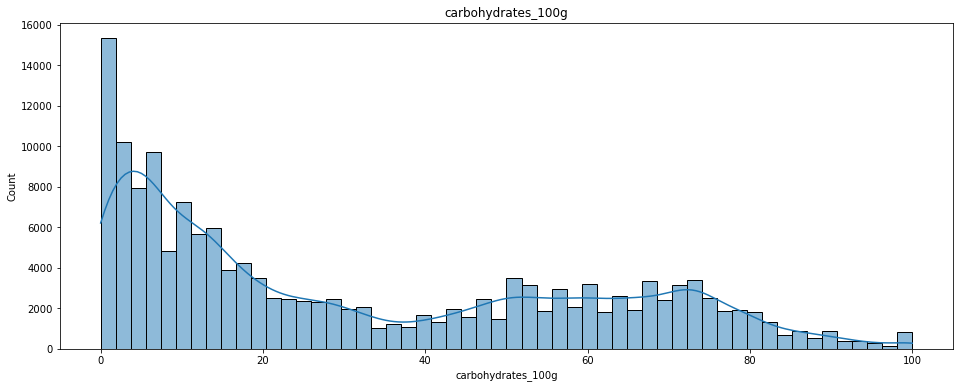

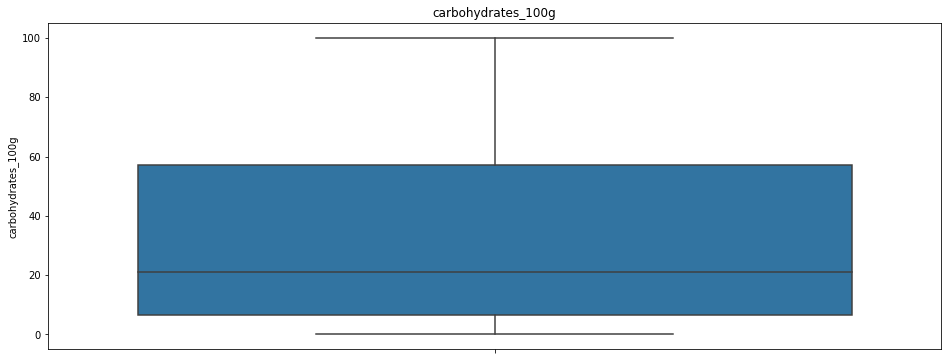

In [248]:
histplot_df('carbohydrates_100g')
boxplot_df('carbohydrates_100g')

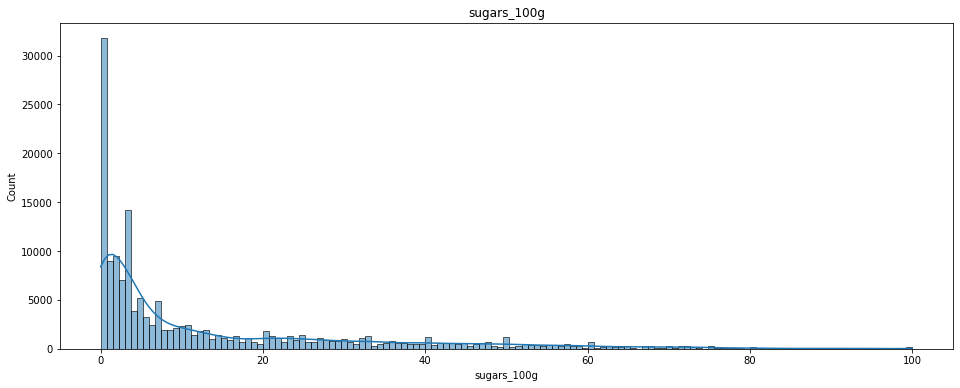

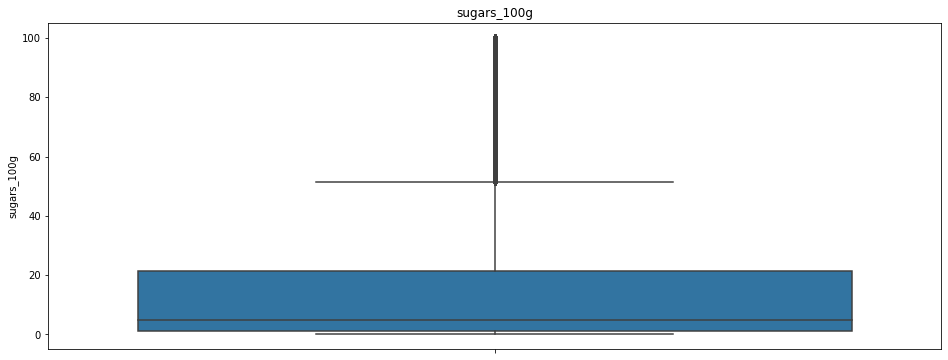

In [249]:
histplot_df('sugars_100g')
boxplot_df('sugars_100g')

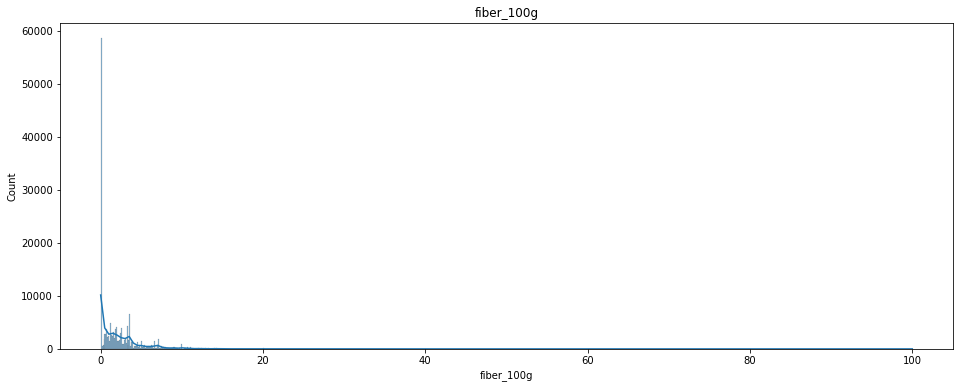

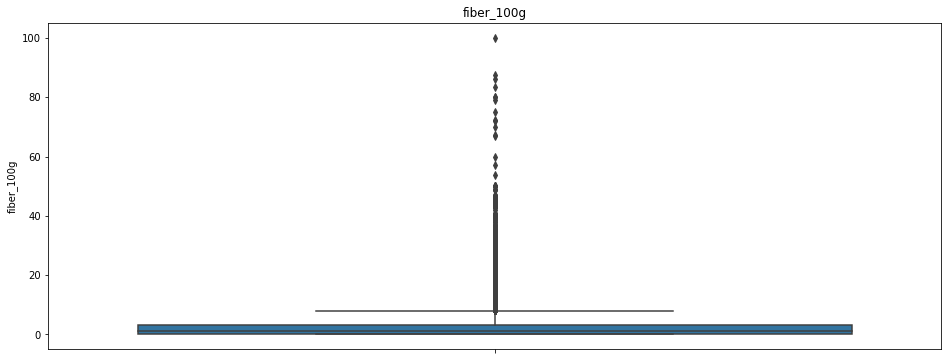

In [250]:
histplot_df('fiber_100g')
boxplot_df('fiber_100g')

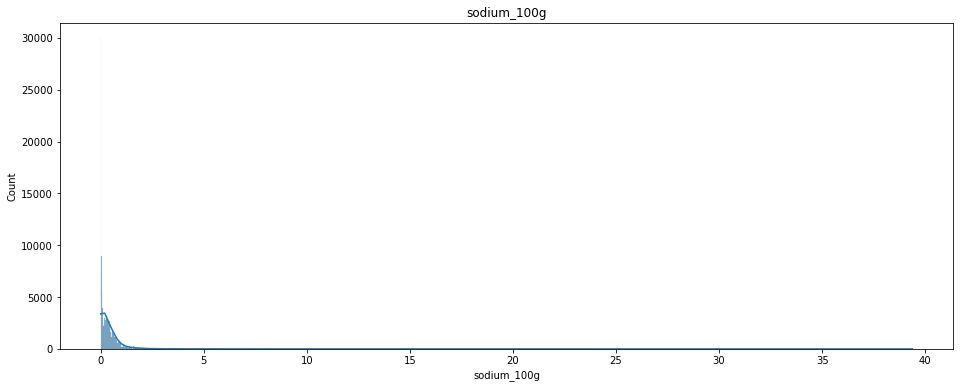

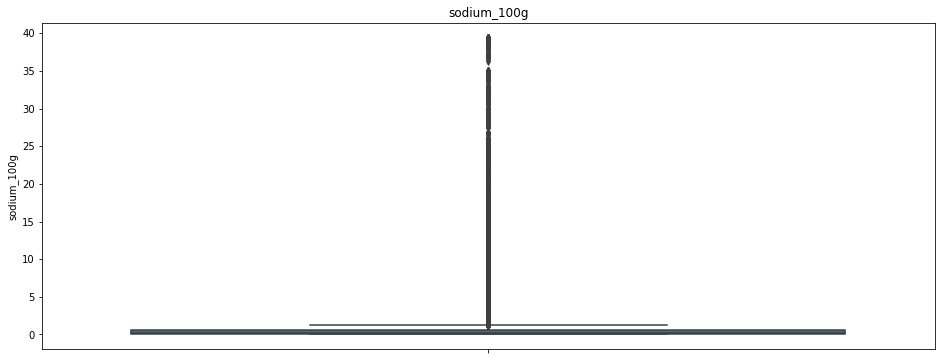

In [251]:
histplot_df('sodium_100g')
boxplot_df('sodium_100g')

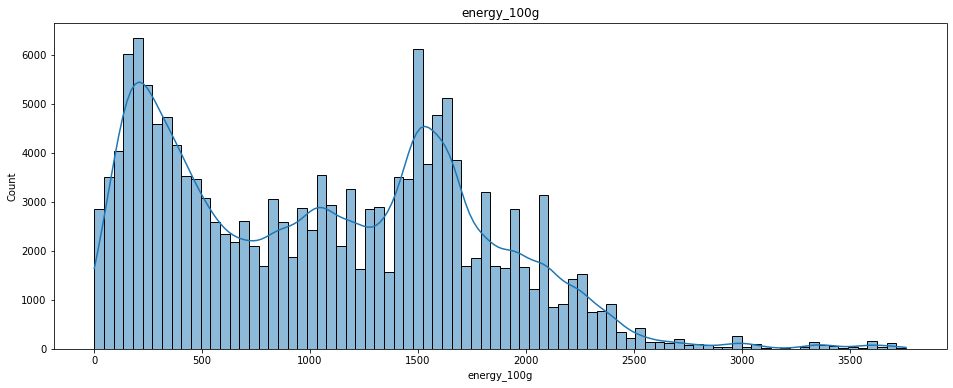

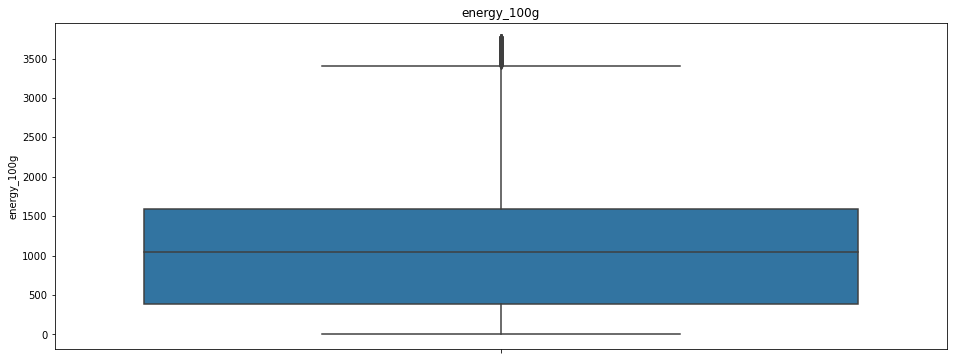

In [252]:
histplot_df('energy_100g')
boxplot_df('energy_100g')

In [253]:
# Calcul des coef d'asymetrie et d'applatissement

In [254]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import normaltest

In [255]:
def coeff_asymétrie_applatissement(v):
    print('Skewness for the input data : ', skew(v))
    print( 'Kurtosis value for the given normal distribution :', kurtosis(v))    

In [256]:
coeff_asymétrie_applatissement(df[var_quant])

Skewness for the input data :  [ 2.2460123   3.30014818  0.56898352  1.74726628  4.71921931  1.99063515
 14.96290063 14.96287258  0.37453599]
Kurtosis value for the given normal distribution : [  7.69201451  22.3694714   -1.06172996   2.65948206  58.67382652
   6.53485652 279.22389504 279.22237496  -0.52302379]


In [257]:
# les variables sont asymétriques, avec un skewness positif indiquant une distribution étalée à droite
# Les variables leptokurtic : fat_100g','saturated-fat_100g', 'carbohydrates_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g',
# Les variables platykrtic: 'energy_100g','sugars_100g',

## variables dicretes : nutrition_score

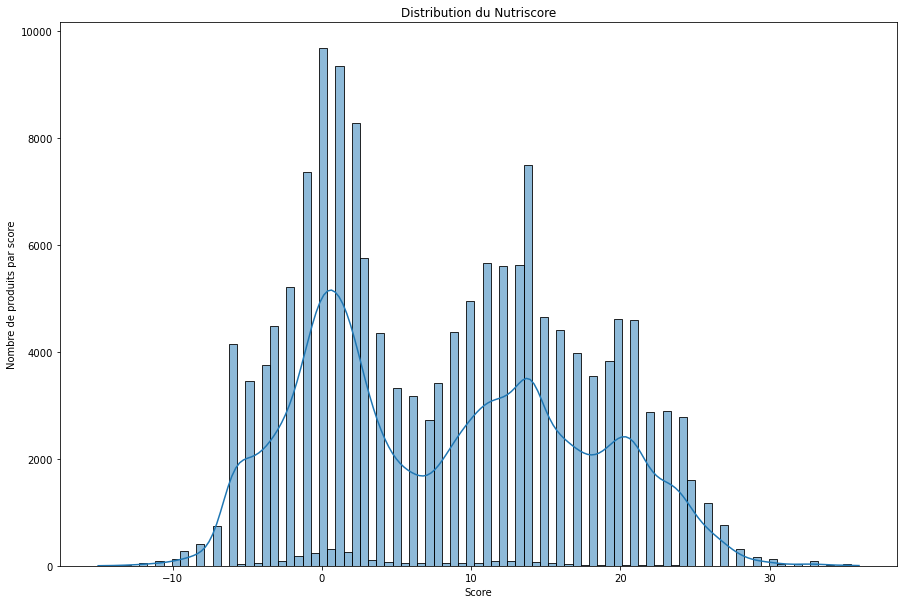

In [42]:
plt.figure(figsize=(15, 10))
sns.histplot(data['nutrition-score-fr_100g'], kde=True,label='Nutriscore_100g')
plt.title('Distribution du Nutriscore')
plt.xlabel('Score')
plt.ylabel('Nombre de produits par score')
plt.show()

### bimodale 0 et 14

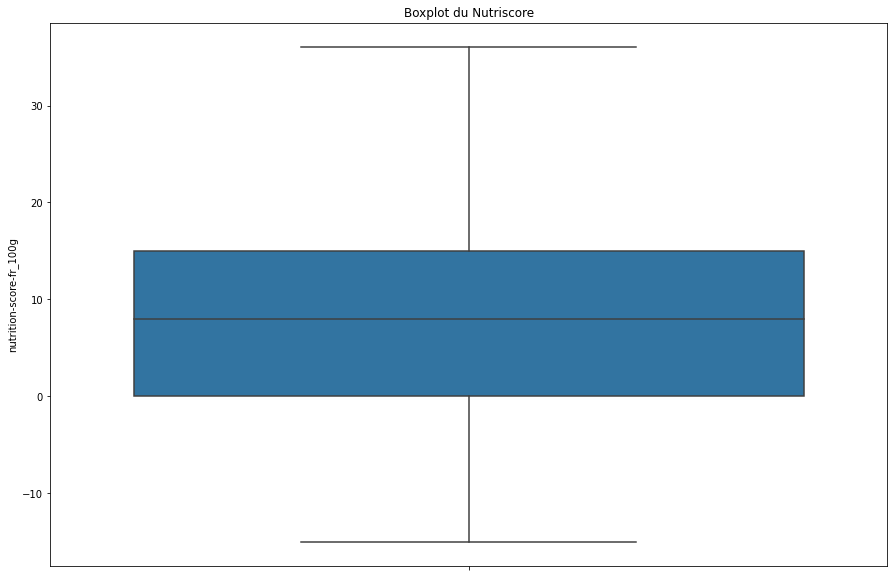

In [43]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['nutrition-score-fr_100g'])
plt.title('Boxplot du Nutriscore')
plt.show()

In [44]:
data['nutrition-score-fr_100g'].describe()

count    158516.000000
mean          8.149920
std           9.021184
min         -15.000000
25%           0.000000
50%           8.000000
75%          15.000000
max          36.000000
Name: nutrition-score-fr_100g, dtype: float64

## variables dicretes : additives_n

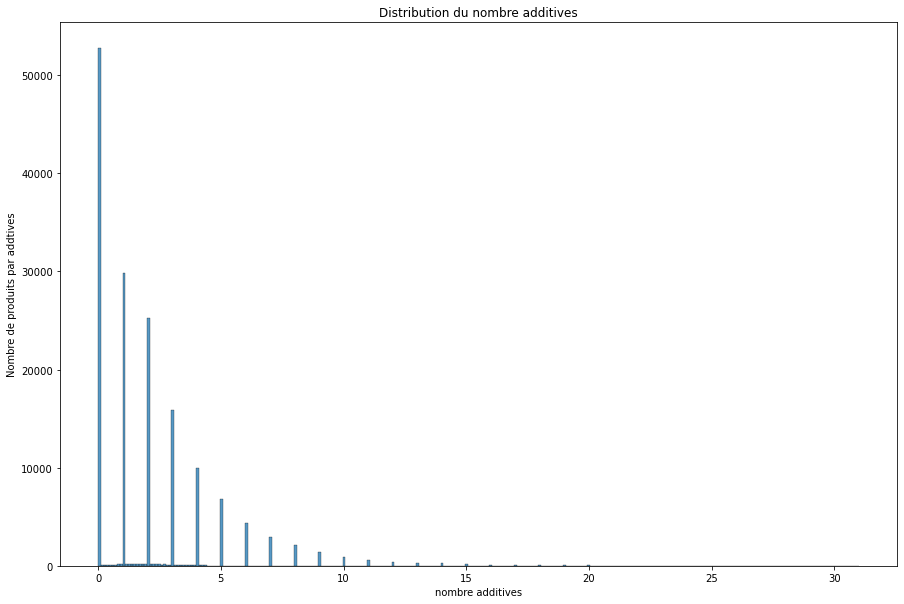

In [45]:
plt.figure(figsize=(15, 10))
sns.histplot(data['additives_n'])
plt.title('Distribution du nombre additives')
plt.xlabel('nombre additives')
plt.ylabel('Nombre de produits par addtives')
plt.show()

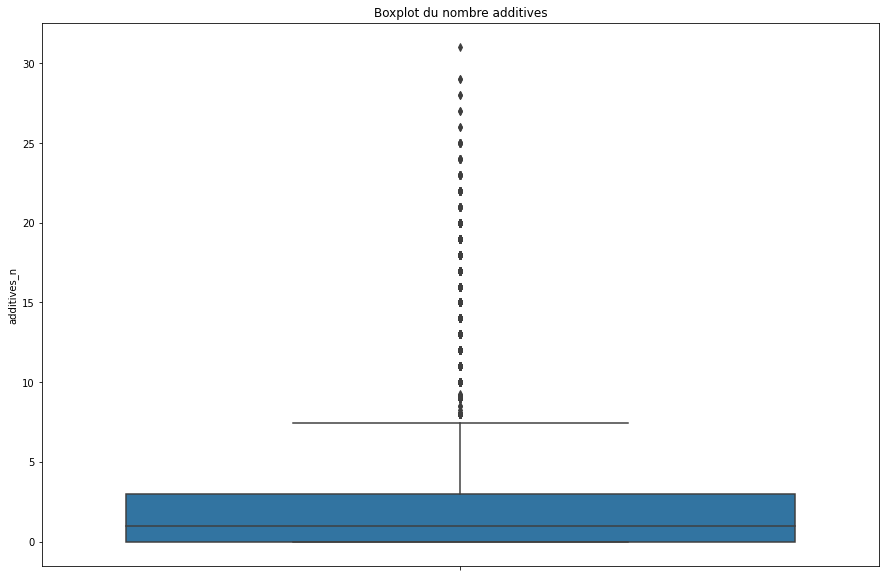

In [46]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['additives_n'])
plt.title('Boxplot du nombre additives')
plt.show()

In [47]:
data['additives_n'].describe()

count    158516.000000
mean          2.051066
std           2.540369
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64

In [262]:
data.describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g
count,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000,158516.000000
mean,10.824128,4.115824,31.683681,14.242646,2.114608,7.050089,1.254551,0.493921,1056.789384,2.051066,8.149920
std,14.145343,6.560760,27.879128,19.030033,3.097899,7.633006,4.119425,1.621814,708.015330,2.540369,9.021184
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.380000,0.000000,6.670000,1.320000,0.000000,1.500000,0.101600,0.040000,381.000000,0.000000,0.000000
50%,4.900000,1.090000,21.000000,5.000000,1.200000,4.800000,0.650240,0.256000,1046.000000,1.000000,8.000000
75%,17.240000,6.000000,57.000000,21.430000,3.200000,10.000000,1.358900,0.535000,1594.000000,3.000000,15.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,86.000000,100.000000,39.370079,3761.000000,31.000000,36.000000


## variables nominales : 'additives et product_name

In [48]:
# nous procédons au regroupement par frequence

In [258]:
freq_nom=data[var_nom].value_counts().reset_index().rename(columns={"index": 0, 0: "Count"})

In [259]:
freq_nom

,additives,product_name,Count
0,[ green-beans -> en:green-beans ] [ beans -...,Cut Green Beans,56
1,[ sugar -> en:sugar ] [ enriched-bleached-w...,Frosted Sugar Cookies,42
2,[ light-tuna -> en:light-tuna ] [ tuna -> e...,Chunk Light Tuna In Water,38
3,[ green-beans -> en:green-beans ] [ beans -...,French Style Green Beans,34
4,[ reduced-fat-milk -> en:reduced-fat-milk ] ...,2% Reduced Fat Milk,33
...,...,...,...
144870,[ filling -> en:filling ] [ cabbage -> en:c...,"Minh, Mini Egg Rolls, White Meat Chicken",1
144871,[ filling -> en:filling ] [ cabbage -> en:c...,Vegetable Mini Spring Rolls,1
144872,[ filling -> en:filling ] [ cabbage -> en:c...,Shrimp Egg Roll,1
144873,[ filling -> en:filling ] [ cabbage -> en:c...,Potstickers Vegetable Dumplings,1


In [260]:
freq_nom.shape

(144875, 3)

## variable ordinale : nutrition_grade

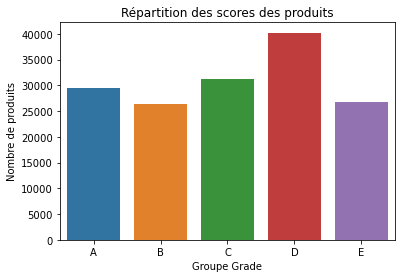

In [51]:
plt.figure(figsize=[6, 4])
sns.countplot(data=data[var_ord], x='nutrition_grade_fr')
plt.xlabel('Groupe Grade')
plt.ylabel('Nombre de produits')
plt.title('Répartition des scores des produits')
plt.show()

# ANALYSE BIVARIEE

In [38]:
num_var=var_quant+var_disc

<Figure size 1080x576 with 0 Axes>

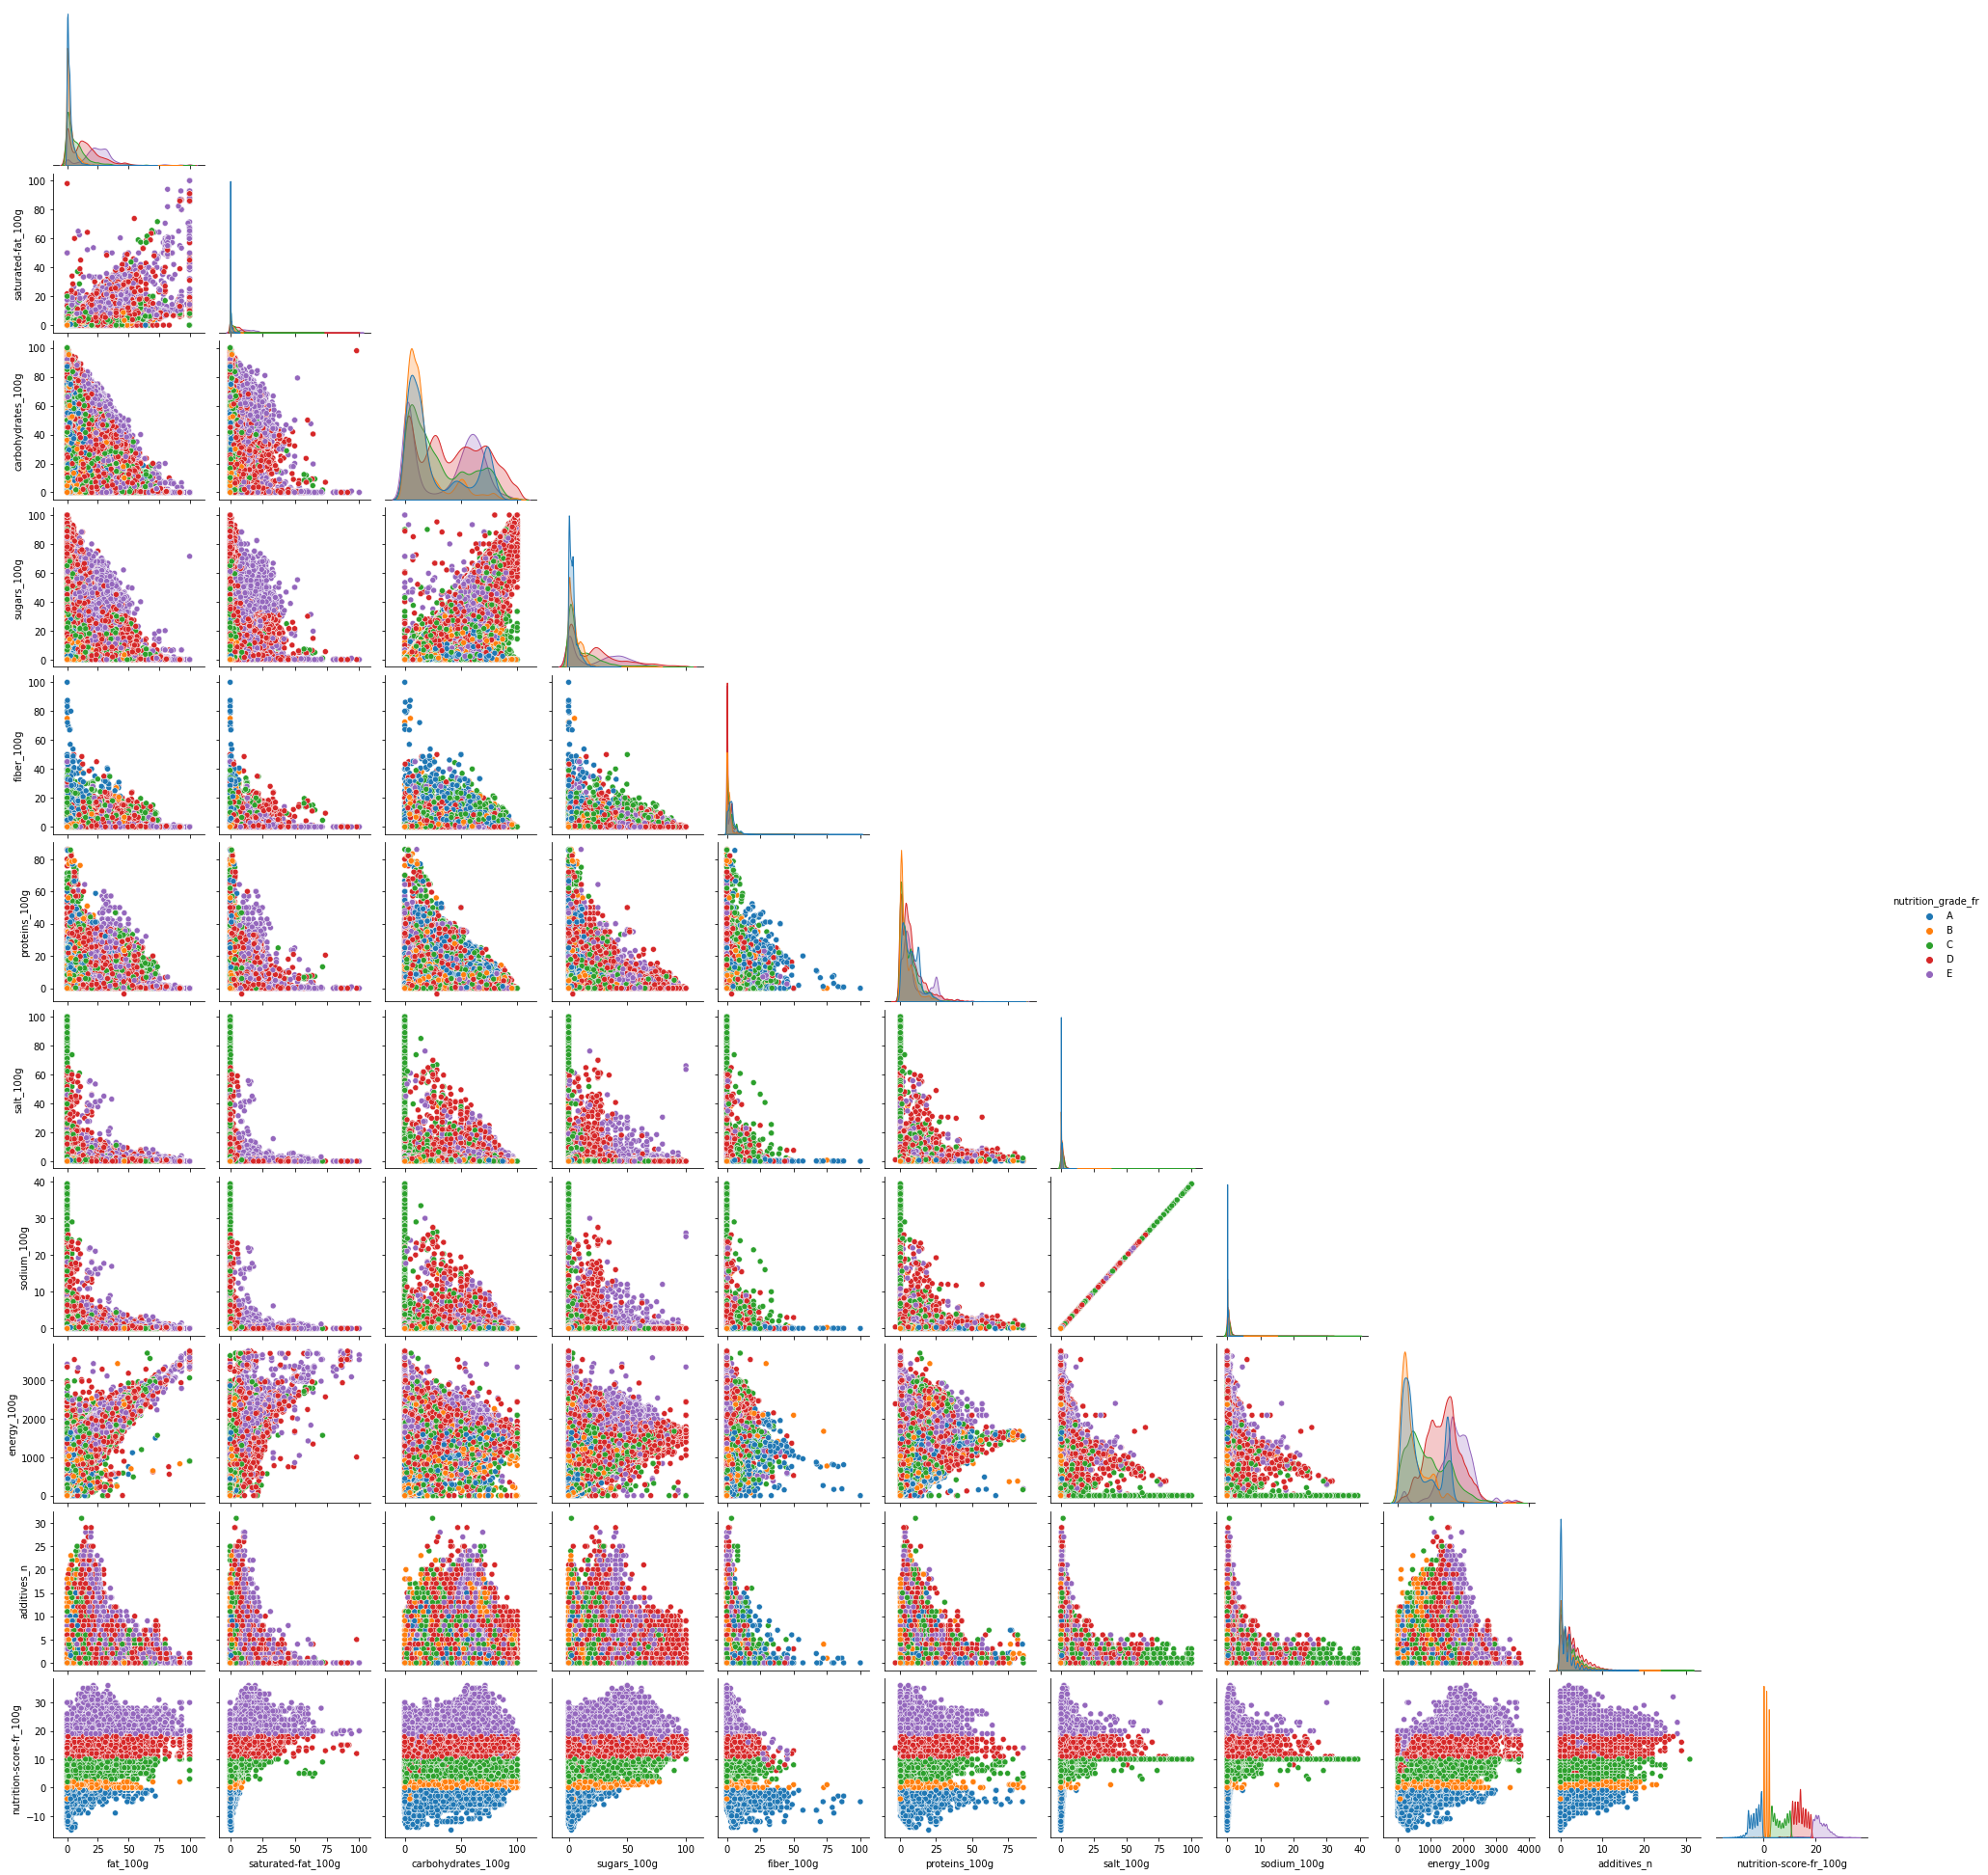

In [74]:
plt.figure(figsize=(15,8))
sns.pairplot(data, hue="nutrition_grade_fr",corner=True)

Text(0.5, 1.0, 'Correlation Indicators')

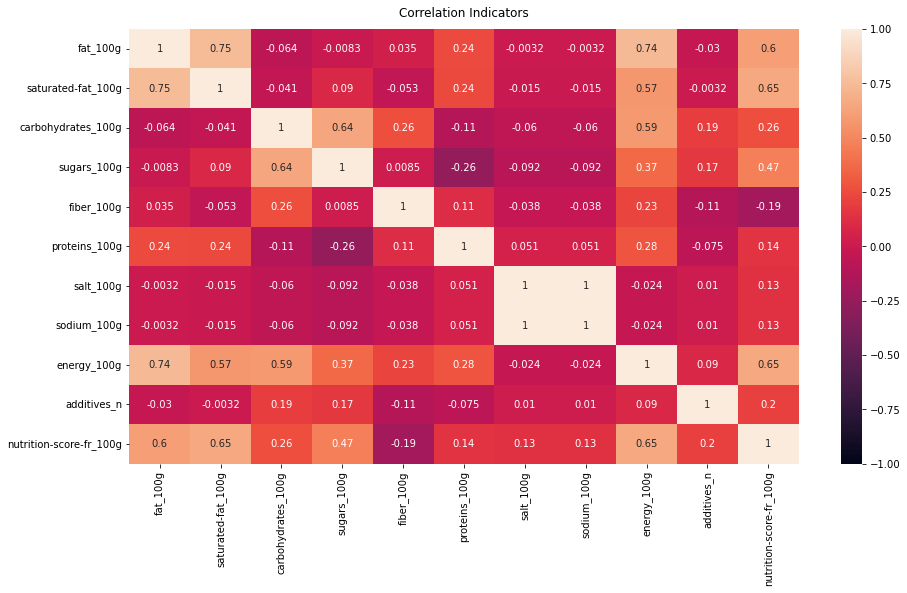

In [53]:
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(data[num_var].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Indicators', fontdict={'fontsize':12}, pad=12)

* additives_n : faible correlation, relation (+) : plus d'add et plus le nutriscore aug --> mal noté

* energy_100g : forte corrélation avec: 
        fat_100g--> lipides : relation(+)
        saturated-fat_100g--> lipides saturés :relation(+)
        carbohydrates_100g --> glucides : relation (+)
        nutrition-score-fr_100g --> relation (+)

* fat_100g et saturated-fat_100g tres forte correlation (attendu)

* nutrition-score-fr_100g : forte corrélation avec:
        energy_100g :(+)
        saturated_fat_100g --> lipides saturés:(+)
        fat_100g-->lipides --> lipides (+)
        sugars_100g (moyenne) --> (+)
        fibre_100g(faible)-->(-)

* sugars_100g : forte correlation avec carbohydrates_100g (attendu)

* sodium_100g correlation très forte avec salt_100g (attendu)


## tests d'indépendance des variables 

### *Test indépendance entre deux variables quantitatives / Test de corrélation Pearson (fait avec la matrice de corr)

### *Test d'indépendance entre deux variables qualitatives / Test du Chi² --> exemple additives_n et nitiscore avec modalités 

### *Test d'indépendance entre une variable qualitative et une quantitative / Test de Fisher avec l'analyse de la variance (ANOVA)

In [54]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [55]:
# testons les variables nutriscore et additive

In [56]:
# creation du jeu de données
tab_contingence=pd.crosstab(data['additives_n'],data['nutrition-score-fr_100g'])

In [57]:
# application test de khi-deux
#H0 : Variables indépendantes si p-value > 5%
#H1 : Variables non indépendantes si p-value < 5%

In [58]:
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(tab_contingence)

In [59]:
p_value

0.0

In [60]:
tab_contingence=pd.crosstab(data['additives_n'],data['product_name'])

In [61]:
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(tab_contingence)

In [62]:
p_value

0.0

In [63]:
tab_contingence=pd.crosstab(data['additives_n'],data['nutrition_grade_fr'])

In [64]:
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(tab_contingence)

In [65]:
p_value

0.0

### Test ANOVA 

# L'ANOVA est une méthode statistique pour tester les moyennes intra et inter groupes

# Il faut au prealable verifier les conditions suivantes:
# 1- Les échantillons sont indépendants 
# 2- La normalité des distributions
# 3- l'homoscédasticité des variances


# D'après la visualisations et les moments d'ordre 3 et 4 les données ne sont pas normales...

In [66]:
# vérification avec un test de normalité Shapiro-Wilk(echantillon trop grand..) ou Kolmogrov Smirnov
# H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
# H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%

In [67]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data['fat_100g'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.755, p=0.000


C:\Users\mehan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [68]:
from scipy import stats
numeric_columns = data[num_var]
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(data[column].dropna(),'norm', args=(data[column].mean(), data[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print('hyp null rejetée : {} ne suit pas une distribution gaussienne'.format(column))
    else:
        print('hyp null acceptée":{}  suit une distribution gaussienne')

________
fat_100g
p = 0.0
hyp null rejetée : fat_100g ne suit pas une distribution gaussienne
________
saturated-fat_100g
p = 0.0
hyp null rejetée : saturated-fat_100g ne suit pas une distribution gaussienne
________
carbohydrates_100g
p = 0.0
hyp null rejetée : carbohydrates_100g ne suit pas une distribution gaussienne
________
sugars_100g
p = 0.0
hyp null rejetée : sugars_100g ne suit pas une distribution gaussienne
________
fiber_100g
p = 0.0
hyp null rejetée : fiber_100g ne suit pas une distribution gaussienne
________
proteins_100g
p = 0.0
hyp null rejetée : proteins_100g ne suit pas une distribution gaussienne
________
salt_100g
p = 0.0
hyp null rejetée : salt_100g ne suit pas une distribution gaussienne
________
sodium_100g
p = 0.0
hyp null rejetée : sodium_100g ne suit pas une distribution gaussienne
________
energy_100g
p = 0.0
hyp null rejetée : energy_100g ne suit pas une distribution gaussienne
________
additives_n
p = 0.0
hyp null rejetée : additives_n ne suit pas une dist

# vérifions dans un souci d'apprentissage la condition d'homoscédasticité en utilisant le test de Bartlett

In [69]:
from scipy.stats import bartlett

In [70]:
data.groupby('nutrition_grade_fr')['additives_n'].agg('mean')

nutrition_grade_fr
A    1.075528
B    1.741053
C    2.154409
D    2.780325
E    2.329222
Name: additives_n, dtype: float64

In [71]:
A=data[data['nutrition_grade_fr'] == 'A'].select_dtypes(['int32','float64'])
B=data[data['nutrition_grade_fr'] == 'B'].select_dtypes(['int32','float64'])
C=data[data['nutrition_grade_fr'] == 'C'].select_dtypes(['int32','float64'])
D=data[data['nutrition_grade_fr'] == 'D'].select_dtypes(['int32','float64'])
E=data[data['nutrition_grade_fr'] == 'E'].select_dtypes(['int32','float64'])



In [72]:
f_statistic, p = stats.f_oneway(A,B,C,D,E)

In [73]:
p

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* Une fonction croissante entre Le nutriscore et les produits contenant des lipides , lipides saturés, sucre et additifs. 
* le nutriscore diminue avec les fibres
* comme attendu, forte relation de dépendance entre lipides et lipides saturés/ sucre et carbohydrates

* Le nombre d'additifs semblent être augmenter quand la note se dégrade 

* L'énergie augmente avec les produits contenant des lipdes (fat et saturated_fat) et des glucides (carbohydrates et sucres) 
* relation positive entre l'energie et le nutriscore !

# Analyse multivariée

In [74]:
cols = ['additives_n', 'nutrition-score-fr_100g', 'nutrition_grade_fr']


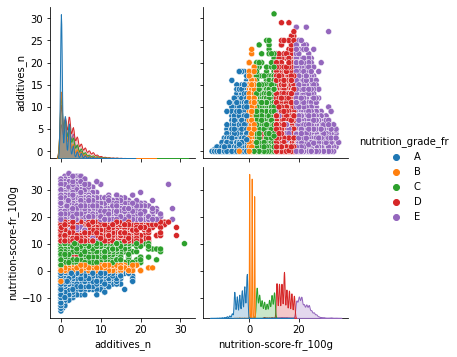

In [75]:
sns.pairplot(data[cols], kind='scatter', hue='nutrition_grade_fr')

## ACP

In [5]:
from sklearn.decomposition import PCA

In [6]:
# preparation donnees ACP

In [39]:
data_pca=data[num_var]

In [40]:
data_pca

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,energy_100g,additives_n,nutrition-score-fr_100g
0,36.67,5.0000,36.67,3.33,6.7,16.67,1.60782,0.633000,2230.0,1.00,12.00
1,5.95,1.1900,66.67,2.38,9.5,16.67,0.02540,0.010000,1096.0,0.00,-6.00
2,17.50,7.5000,42.50,32.50,5.0,7.50,0.28448,0.112000,1464.0,0.00,14.00
3,50.00,3.3300,23.33,6.67,10.0,6.67,1.27000,0.500000,2372.0,2.00,11.00
4,20.00,2.2200,60.00,33.33,4.4,8.89,0.19812,0.078000,1954.0,3.00,9.00
...,...,...,...,...,...,...,...,...,...,...,...
158511,0.00,0.0000,87.06,2.35,4.7,1.18,0.03048,0.012000,1477.0,0.00,-1.00
158512,2.80,0.6000,74.80,2.60,5.9,13.00,0.68000,0.267717,1643.0,1.58,-4.00
158513,31.00,3.4992,12.20,9.60,1.1,2.10,1.10000,0.433071,569.0,0.00,7.16
158514,0.20,0.2000,0.50,0.50,0.2,0.50,0.02540,0.010000,21.0,0.00,2.00


In [41]:
# standardisation : mise à l'échelle

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
to_standard = data_pca.values
to_standard
scaler= StandardScaler()
fitted = scaler.fit_transform(to_standard)
fitted

array([[ 1.82717057,  0.13476768,  0.17885549, ...,  1.65704649,
        -0.41374678,  0.42678347],
       [-0.34457582, -0.44595951,  1.2549327 , ...,  0.0553812 ,
        -0.80739164, -1.56852623],
       [ 0.47194992,  0.51582227,  0.38797316, ...,  0.5751456 ,
        -0.80739164,  0.64848455],
       ...,
       [ 1.42633066, -0.09398701, -0.69886482, ..., -0.68895531,
        -0.80739164, -0.10973314],
       [-0.75107132, -0.59685713, -1.11853494, ..., -1.46295229,
        -0.80739164, -0.68172192],
       [-0.7652103 , -0.6273415 , -1.13646956, ..., -1.49261276,
        -0.80739164, -0.903423  ]])

In [44]:
# application ACP et choix dim

In [45]:
pca=PCA()
data_pca=pca.fit_transform(fitted)

In [46]:
explained_variance = pca.explained_variance_ratio_

In [47]:
explained_variance

array([2.98745766e-01, 1.93672805e-01, 1.67727522e-01, 1.19960013e-01,
       8.19990593e-02, 6.31589023e-02, 3.62581139e-02, 2.22366631e-02,
       1.50842091e-02, 1.15692660e-03, 2.01893345e-08])

In [48]:
choix_dim = np.cumsum(explained_variance)

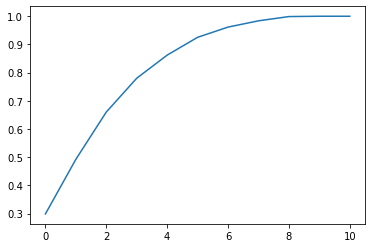

In [49]:
plt.plot(choix_dim)

### dim=8 qui explique 100% de la variance

In [50]:
# visualisation cercle des correlations

[0.43437349 0.42370069 0.2396576  0.25120226 0.03774935 0.14308751
 0.00962363 0.00962346 0.50746853 0.08691046 0.47338889] 
 [ 0.15908927  0.14226181 -0.34060635 -0.32813553 -0.11569931  0.21362593
  0.57108751  0.57108706 -0.06340007 -0.09501507  0.08009619]


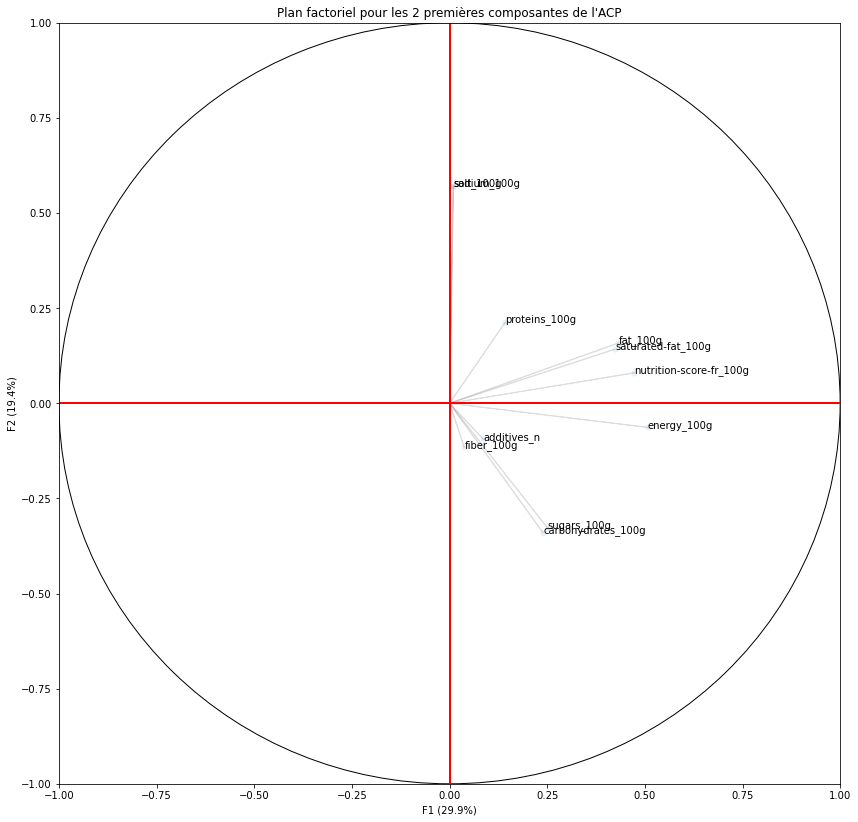

In [62]:
xpca =pca.components_[0,:]
ypca =pca.components_[1,:]

print(pca.components_[0,:],'\n',pca.components_[1,:])
fig, axes = plt.subplots(figsize=(14,14))

plt.title("Plan factoriel pour les 2 premières composantes de l'ACP")
plt.xlabel('F1 ({}%)'.format(np.around(explained_variance[0]*100,1)))
plt.ylabel('F2 ({}%)'.format(np.around(explained_variance[1]*100,1)))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
cercle = plt.Circle((0,0),1,fill=False)
axes.add_artist(cercle)

plt.plot([-1,1],[0,0],color='red',linestyle='-',linewidth=2)
plt.plot([0,0],[-1,1],color='red',linestyle='-',linewidth=2)

sns.scatterplot(x= xpca, y= ypca ,alpha = 0.1)

for i in range(len(num_var)):
    plt.annotate(num_var[i], (xpca[i],ypca[i]))
    axes.arrow(0, 0, xpca[i], ypca[i], head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)

# T-SNE

In [184]:
from sklearn.manifold import TSNE

In [185]:
data_norm=data_pca

In [121]:
tsne=TSNE(n_components=2,random_state=0)
tsne_features= tsne.fit_transform(data_norm) 

In [131]:
tsne_features

array([[ -8.502996 ,  -8.546748 ],
       [ -8.534693 , -19.653574 ],
       [-18.813496 ,  -6.5544786],
       ...,
       [ 14.764672 ,  11.176751 ],
       [ -5.803179 ,  48.029503 ],
       [  6.99729  ,  45.628914 ]], dtype=float32)

In [140]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [2.98745766e-01 1.93672805e-01 1.67727522e-01 1.19960013e-01
 8.19990593e-02 6.31589023e-02 3.62581139e-02 2.22366631e-02
 1.50842091e-02 1.15692660e-03 2.01893345e-08]


In [125]:
tsne_df=pd.DataFrame(tsne_features)

In [149]:
tsne_df.head()

,0,1,tsne-2d-one,tsne-2d-two
0,-8.502996,-8.546748,-8.502996,-8.546748
1,-8.534693,-19.653574,-8.534693,-19.653574
2,-18.813496,-6.554479,-18.813496,-6.554479
3,38.708721,24.378954,38.708721,24.378954
4,-16.781128,-0.823580,-16.781128,-0.823580


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

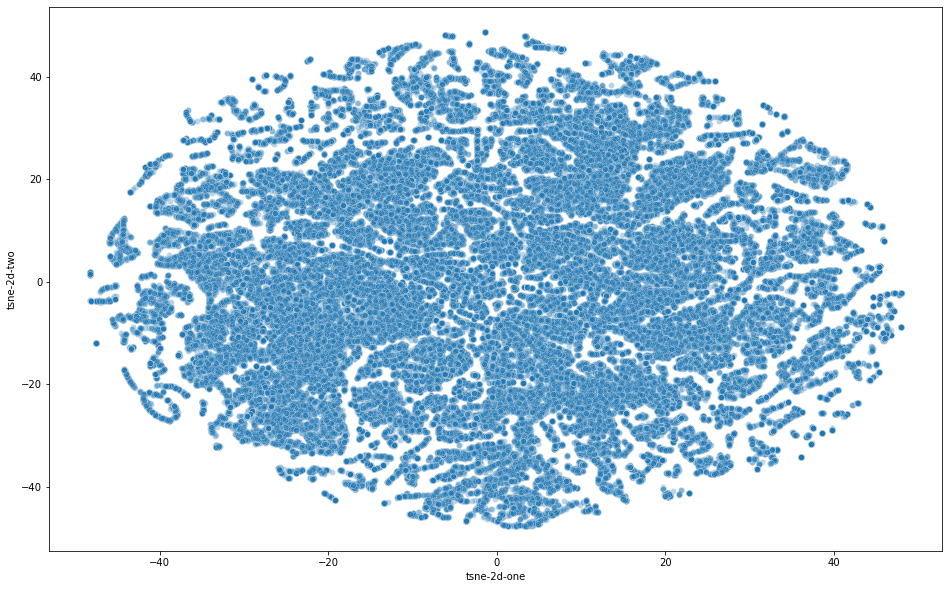

In [269]:
tsne_df['tsne-2d-one'] = tsne_features[:,0]
tsne_df['tsne-2d-two'] = tsne_features[:,1]
data['additives_n']
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y='tsne-2d-two',
    data=tsne_df,
    legend="full",
    alpha=0.3)


# Régression linéaire multiple

In [204]:
from sklearn.linear_model import LinearRegression
modeleReg = LinearRegression()

In [206]:
X=pd.DataFrame(np.c_[data['energy_100g'],data['fiber_100g'],data['additives_n']],columns=['energy_100g','fiber_100g','additives_n'])
Y=data['nutrition-score-fr_100g']

In [216]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

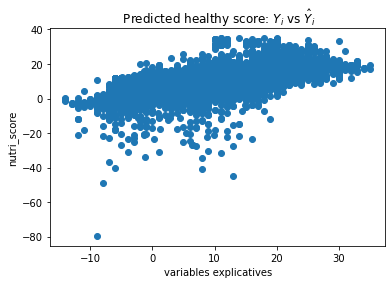

In [270]:
y_pred_from_sklearn = lm.predict(X_test)

plt.scatter(Y_test, y_pred_from_sklearn)
plt.xlabel("variables explicatives")
plt.ylabel("nutri_score")
plt.title(" Predicted healthy score: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [218]:
print(lm.intercept_)
print(lm.coef_)

-0.03655856413707603
[ 0.00926965 -1.00943213 -0.02084425  0.33079431]
